In [1]:
from itertools import pairwise
import random

class Sequence:
    N = 200
    states = ['H', 'C1', 'C2']

    def __init__(self, seq=None): 
        if seq:
            self.seq = seq
        else: 
            self.seq = []
            for _ in range(self.N):
                self.seq.append(self.states[random.randint(0,2)])
            
    def random_flip(self):
        new_seq = self.seq.copy()
        idx = random.randint(0, self.N-1)
        new_seq[idx] = self.states[random.randint(0,2)]
        return new_seq
    
    def get_potential_energy(self) -> float:
        energy = 0
        for a, b in pairwise(self.seq):
            if a == b == 'H':
                energy -= 1
        return energy
    
    def get_total_h(self) -> int:
        return self.seq.count('H') / self.N
    
s = Sequence()
print(' '.join(s.seq))
s.random_flip()
print(' '.join(s.seq))
s.get_potential_energy()

C1 C1 C1 C1 H C1 C1 C2 H H H H C2 C2 H H C1 C2 C1 H C1 H H C2 H C2 H C1 C1 C2 C2 C1 C2 H H C1 H C1 C1 C1 H C2 H C2 C1 H C1 C2 H C2 C1 C2 C2 C2 C1 H C1 C2 H H C1 C1 H C1 C2 H H C1 H C2 H C1 C2 C2 H C1 C1 C1 C1 H C2 H C1 C1 C2 C2 C1 H C1 H C2 C2 C2 H H H C1 H C1 C2 C1 C1 C2 C1 C1 C1 C2 C1 C2 H H C1 C2 H C1 H H H C1 C1 H H C2 H H C1 H H C2 H H C2 H C2 H C2 H H C1 C2 H H C1 C1 C2 C1 H C1 C1 H C1 C1 C2 C1 C2 H H C1 C1 C1 C2 C2 C1 H H C1 C1 C2 C1 C1 C1 C2 H C2 C2 H C2 C2 C2 H C1 C1 C2 C1 C1 C2 C1 C1 C1 H C1 C1 C1 C1 H H H C2 H H
C1 C1 C1 C1 H C1 C1 C2 H H H H C2 C2 H H C1 C2 C1 H C1 H H C2 H C2 H C1 C1 C2 C2 C1 C2 H H C1 H C1 C1 C1 H C2 H C2 C1 H C1 C2 H C2 C1 C2 C2 C2 C1 H C1 C2 H H C1 C1 H C1 C2 H H C1 H C2 H C1 C2 C2 H C1 C1 C1 C1 H C2 H C1 C1 C2 C2 C1 H C1 H C2 C2 C2 H H H C1 H C1 C2 C1 C1 C2 C1 C1 C1 C2 C1 C2 H H C1 C2 H C1 H H H C1 C1 H H C2 H H C1 H H C2 H H C2 H C2 H C2 H H C1 C2 H H C1 C1 C2 C1 H C1 C1 H C1 C1 C2 C1 C2 H H C1 C1 C1 C2 C2 C1 H H C1 C1 C2 C1 C1 C1 C2 H C2 C2 H C2 C2 C

-24

In [3]:
import math
from tqdm import tqdm
from functools import lru_cache

@lru_cache(maxsize=None)
def monte_carlo_algorithm(start_after: int = 1_000, iterations: int = 1_00_000, KT: int = 1):
    '''
    Naive implementation without a convergence check, just goes for a fixed number of iterations
    Psuedo code:
        1. Initialize any seq X(0)
        2. Propose a new seq X(1)
        3. Compute energy difference: E(X(1)) - E(X(0))
        
        if dE < 0:
            accept X(1)
        else:
            accept X(1) with probability exp(-dE / kT)
        
        4. Iterate until convergence
    
    Returns a list of distribution of seqs
    '''
        
    current_seq = Sequence()
    seq_history = []
    
    for i in tqdm(range(iterations)):
        proposed = Sequence(current_seq.random_flip())
        energy_difference = proposed.get_potential_energy() - current_seq.get_potential_energy()
        
        if energy_difference < 0 or random.random() < math.exp(-energy_difference / KT):
            current_seq = proposed
            
        if i > start_after:
            seq_history.append(current_seq)
    
    return seq_history


/var/folders/d8/6961hjxn69l6pchnksn1_83w0000gn/T/ipykernel_30593/3305122940.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('plasma', len(POSS_KT))


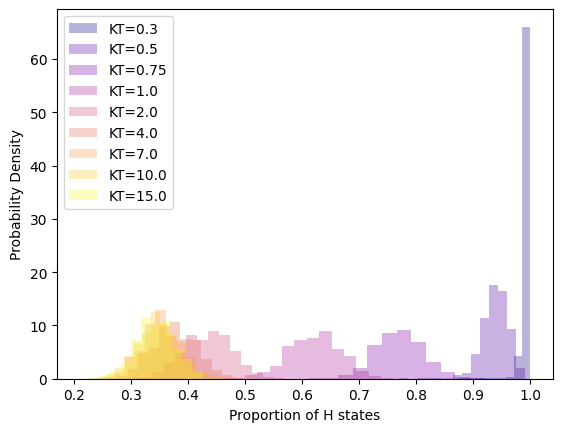

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

POSS_KT = [0.3, 0.5, 0.75, 1.0, 2.0, 4.0, 7.0, 10.0, 15.0]
colormap = cm.get_cmap('plasma', len(POSS_KT)) 

for i, KT in enumerate(POSS_KT):
    seq_history = monte_carlo_algorithm(KT=KT)
    h_counts = [seq.get_total_h() for seq in seq_history]
    color = colormap(i / (len(POSS_KT) - 1))
    plt.hist(h_counts, bins=15, density=True, alpha=0.3, label=f'KT={KT}', color=color)
    
plt.xlabel('Proportion of H states')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
plt.close()

/var/folders/d8/6961hjxn69l6pchnksn1_83w0000gn/T/ipykernel_49456/2074914140.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('jet', len(POSS_KT))
100%|██████████| 1000000/1000000 [00:27<00:00, 36502.50it/s]


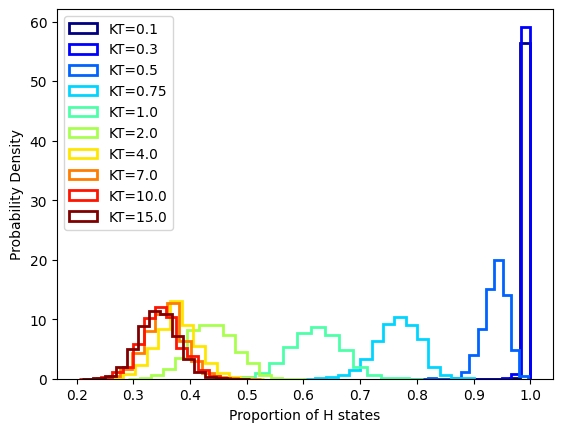

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

POSS_KT = [0.1, 0.3, 0.5, 0.75, 1.0, 2.0, 4.0, 7.0, 10.0, 15.0]
colormap = cm.get_cmap('jet', len(POSS_KT))

for i, KT in enumerate(POSS_KT):
    seq_history = monte_carlo_algorithm(KT=KT)
    h_counts = [seq.get_total_h() for seq in seq_history] 

    color = colormap(i / (len(POSS_KT) - 1))
    plt.hist(h_counts, bins=15, density=True, histtype='step', label=f'KT={KT}', color=color, linewidth=2)
    
plt.xlabel('Proportion of H states')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
plt.close()


100%|██████████| 1000000/1000000 [00:15<00:00, 64422.28it/s]


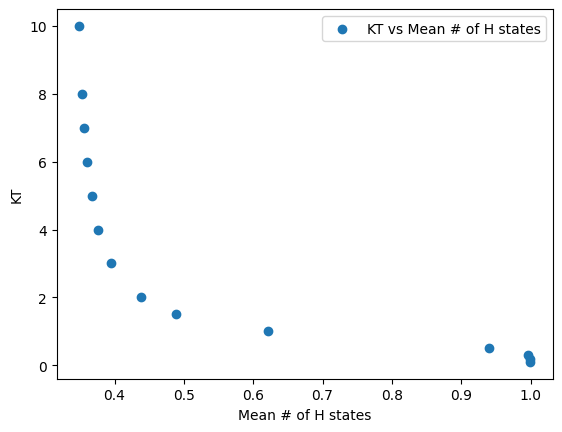

In [65]:
POSS_KT = [0.1, 0.2, 0.3, .5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0]

means = []
for KT in POSS_KT:
    seq_history = monte_carlo_algorithm(KT=KT)
    h_counts = [seq.get_total_h() for seq in seq_history] 
    means.append(np.mean(h_counts))
    
plt.scatter(means, POSS_KT, label='KT vs Mean # of H states')
plt.xlabel('Mean # of H states')
plt.ylabel('KT')
plt.legend()
plt.show()
plt.close()

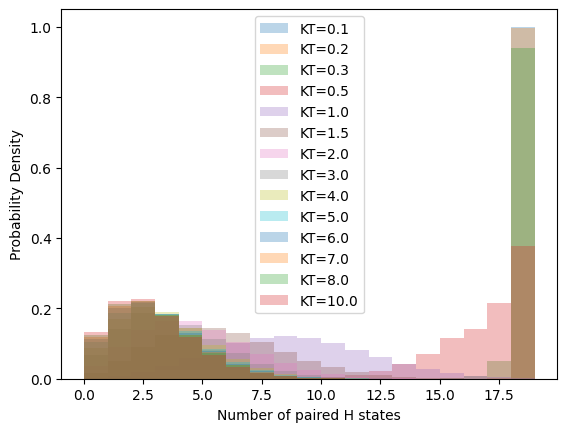

In [59]:
for KT in POSS_KT:
    seq_history = monte_carlo_algorithm(KT=KT)
    h_counts = [-seq.get_potential_energy() for seq in seq_history]
    plt.hist(h_counts, bins=np.arange(0, 20), density=True, alpha=0.3, label=f'KT={KT}')
    
plt.xlabel('Number of paired H states')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
plt.close()